# <u>Image Rotation</u>
#Rotate Image
### Ref: https://www.pyimagesearch.com/2021/01/20/opencv-rotate-image/




## <u>Contents</u>

#### 1)Using OpenCV

    1.a) Methods cv.getRotationMatrix2D() and cv.warpAffine()

    1.b) Rotating about the centre

    1.c) 1.c Rotating about an arbitrary point other than the centre

#### 2) Using imutils

    2.a) imutils.rotate()
    
    2.b) imutils.rotate_bound()

    

Rotation by an angle \theta can be defined by constructing a matrix, M, in the form:

<img src = "rot_mat.png">

-->matrix can be used to rotate a vector \theta degrees (counterclockwise) about the origin

-->origin is normally the center of the image

-->however, in practice, we can define any arbitrary (x, y)-coordinate as our rotation center.

-->From the original image, I, the rotated image, R, is then obtained by simple matrix multiplication: R = I x M









## 1. Using OpenCV

--> Provides the ability to scale an image

--> Provides an arbitrary rotation center around which to perform the rotation

Our modified rotation matrix, M, is thus:

<img src = "mod_rot_mat.png">

Here:

<img src = "eqn1.png">
and
<img src = "eqn2.png">


Cx and Cy are the respective (x, y)-coordinates around which the rotation is performed.



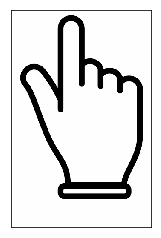

In [49]:
#import required packages
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

#Read image
img = cv.imread("content_pointer.png")

#Verify read image
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



### a. Methods cv.getRotationMatrix2D() and cv.warpAffine()
#### cv.getRotationMatrix2D((Cx, Cy), angle, scale)
    --> Calculates an affine matrix of 2D rotation.
    --> Takes 3 arguments
    --> 1st argument ((Cx, Cy)) is the point about which we rotate the image ((Cx, Cy)) 
    --> 2nd argument (angle) is the angle in degrees by which the image is to be rotated
    --> 3rd argument (scale) is scale of the image. For example1.0 gives the same dimensions of input image, 2.0 doubles the dimensions and 0.5 halves the dimensions.

#### cv.warpAffine(image, M, (w, h))
    --> Applies an affine transformation to an image. Used to apply the rotation matrix M obtained from getRotationMatrix2D to our image
    --> We have used 3 argumrnts
    --> 1st argument (image) specifies the image to which the rotation matrix is to be applied
    --> 2nd argument (M) specifies the rotation matrix
    --> 3rd argument (w,h) output dimensions, (width and height) of image
        

### 1.b Rotating about the centre


In [50]:
# calculate the center of the image
(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2) 

### 1.c Rotating about an arbitrary point other than the centre

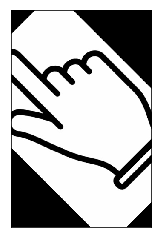

In [51]:
#Rotate the image

# rotate our image by 45 degrees around the center of the image
M = cv.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv.warpAffine(img, M, (w, h))
plt.imshow(rotated)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


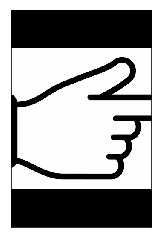

In [52]:
# rotate our image by -90 degrees around the center of the image
M = cv.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv.warpAffine(img, M, (w, h))
plt.imshow(rotated)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

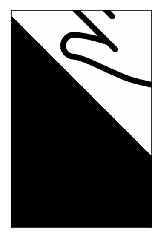

In [53]:
# Rotate our image around an arbitrary point rather than the center
M = cv.getRotationMatrix2D((10, 10), 45, 1.0) #Arbitrary point taken is (10,10)
rotated = cv.warpAffine(img, M, (w, h))
plt.imshow(rotated)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## 2. Using imutils

#### 2.a) imutils.rotate(image, angle)

    --> making calls to both cv.getRotationMatrix2D and cv.warpAffine can become quite tedious 
    --> imutils.rotate() is a convenience function that wraps calls to cv2.getRotationMatrix2D() and cv2.warpAffine()
    --> 1st argument (image) specifies the image to be rotated
    --> 2nd argument (angle) specifies the angle by which the image is to be rotated
    --> Negative value of angle specifies a rotation in clockwise direction and  a positive angle value in the counter-clockwise direction

In the above examples, the rotated image does not fit into the view. For that, we have to adjust (w,h) value in the warpAffine() function.

#### 2.b) imutils.rotate_bound(image, angle)


    --> Automatically expand the image array such that the entire rotated image fits within it.
    --> Hence rotated image is not cut-off
    --> Makes it possible to rotate an image with OpenCV in a single function call.
    --> 1st argument (image) specifies the image to be rotated
    --> 2nd argument (angle) specifies the angle by which the image is to be rotated
    --> Negative value of angle specifies a rotation in couter-clockwise direction and  a positive angle value in the clockwise direction


In [54]:
#importing imutils
import imutils

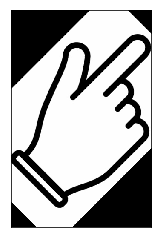

In [55]:
# Using imutils.rotate function to rotate image
# Rotate our image by 45 degrees counterclockwise, ensuring image fits to view area
rotated = imutils.rotate(img, -45)
plt.imshow(rotated)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

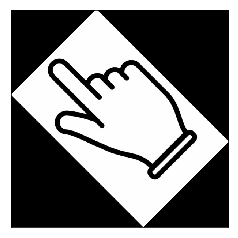

In [56]:
# Using imutils.rotate_bound function to rotate image
# Rotate our image by 45 degrees counterclockwise, ensuring image fits to view area
rotated = imutils.rotate_bound(img, -45)
plt.imshow(rotated)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()